In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
X_train = np.load("../SpeechER/data_split/X_train.npy")
X_test = np.load("../SpeechER/data_split/X_test.npy")
y_train = np.load("../SpeechER/data_split/y_train.npy")
y_test = np.load("../SpeechER/data_split/y_test.npy")

In [4]:
model = Sequential()
model.add(Conv1D(filters=32*8, kernel_size=5, activation="relu", padding="same", input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Conv1D(filters=32*4, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv1D(filters=32*2, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", padding="same"))
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", padding="same"))
model.add(MaxPooling1D(pool_size=5, padding="same"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()
model.save(filepath="../SpeechER/models/model4.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 33, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 33, 256)          1024      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 33, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 128)           0         
 1D)                                                             
                                                        

2023-06-09 21:14:21.255991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 21:14:21.280096: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 21:14:21.280372: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 21:14:21.281405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-09 21:14:21.281596: I tensorflow/compiler/xla/stream_executo

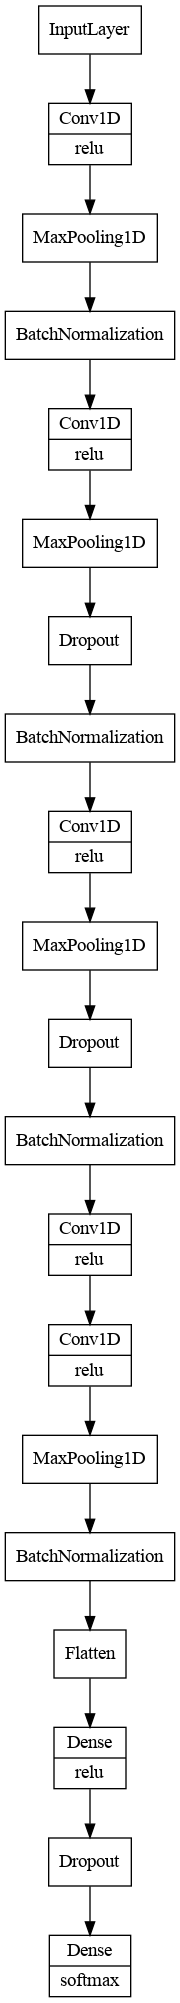

In [5]:
plot_model(model, "../SpeechER/figs/m4arc.png", show_layer_names=False, show_layer_activations=True)

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("../SpeechER/checkpoints/model4_best", save_best_only=True)
stop_early = EarlyStopping(monitor='val_loss', patience=20)

In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[stop_early, checkpoint])

Epoch 1/100


2023-06-04 11:32:16.356286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8901
2023-06-04 11:32:16.862348: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 2232025088 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 33554432/4100456448
2023-06-04 11:32:16.862389: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      1074790400
InUse:                        98595920
MaxInUse:                    122516576
NumAllocs:                         201
MaxAllocSize:                 38010880
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-04 11:32:16.862404: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocati

214/214 [==============================] - ETA: 0s - loss: 1.8076 - accuracy: 0.2776

2023-06-04 11:32:20.764952: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1989804032 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 27262976/4100456448
2023-06-04 11:32:20.764988: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      1074790400
InUse:                        85502248
MaxInUse:                    174237284
NumAllocs:                       51729
MaxAllocSize:                 73629696
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-04 11:32:20.765000: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-06-04 11:32:20.765005: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 9s 22ms/step - loss: 1.8076 - accuracy: 0.2776 - val_loss: 1.9395 - val_accuracy: 0.1930
Epoch 2/100
213/214 [============================>.] - ETA: 0s - loss: 1.5262 - accuracy: 0.3894

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 19ms/step - loss: 1.5257 - accuracy: 0.3895 - val_loss: 1.6512 - val_accuracy: 0.3617
Epoch 3/100
210/214 [============================>.] - ETA: 0s - loss: 1.4216 - accuracy: 0.4409

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.4211 - accuracy: 0.4408 - val_loss: 1.3877 - val_accuracy: 0.4581
Epoch 4/100
214/214 [==============================] - ETA: 0s - loss: 1.3536 - accuracy: 0.4660

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.3536 - accuracy: 0.4660 - val_loss: 1.2897 - val_accuracy: 0.4875
Epoch 5/100
211/214 [============================>.] - ETA: 0s - loss: 1.3069 - accuracy: 0.4817

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 19ms/step - loss: 1.3067 - accuracy: 0.4817 - val_loss: 1.2228 - val_accuracy: 0.5189
Epoch 6/100
212/214 [============================>.] - ETA: 0s - loss: 1.2728 - accuracy: 0.4977

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.2725 - accuracy: 0.4981 - val_loss: 1.2209 - val_accuracy: 0.5113
Epoch 7/100
212/214 [============================>.] - ETA: 0s - loss: 1.2449 - accuracy: 0.5056

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.2454 - accuracy: 0.5054 - val_loss: 1.1900 - val_accuracy: 0.5334
Epoch 8/100
213/214 [============================>.] - ETA: 0s - loss: 1.2325 - accuracy: 0.5120

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.2323 - accuracy: 0.5122 - val_loss: 1.1706 - val_accuracy: 0.5417
Epoch 9/100
214/214 [==============================] - 2s 11ms/step - loss: 1.2162 - accuracy: 0.5184 - val_loss: 1.1790 - val_accuracy: 0.5243
Epoch 10/100
209/214 [============================>.] - ETA: 0s - loss: 1.2018 - accuracy: 0.5228

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 17ms/step - loss: 1.2027 - accuracy: 0.5229 - val_loss: 1.1486 - val_accuracy: 0.5470
Epoch 11/100
210/214 [============================>.] - ETA: 0s - loss: 1.1791 - accuracy: 0.5340

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.1798 - accuracy: 0.5339 - val_loss: 1.1257 - val_accuracy: 0.5487
Epoch 12/100
214/214 [==============================] - 2s 11ms/step - loss: 1.1743 - accuracy: 0.5334 - val_loss: 1.1427 - val_accuracy: 0.5533
Epoch 13/100
214/214 [==============================] - 2s 11ms/step - loss: 1.1604 - accuracy: 0.5428 - val_loss: 1.1289 - val_accuracy: 0.5592
Epoch 14/100
214/214 [==============================] - 2s 11ms/step - loss: 1.1540 - accuracy: 0.5438 - val_loss: 1.1508 - val_accuracy: 0.5413
Epoch 15/100
211/214 [============================>.] - ETA: 0s - loss: 1.1507 - accuracy: 0.5476

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 17ms/step - loss: 1.1507 - accuracy: 0.5476 - val_loss: 1.1243 - val_accuracy: 0.5476
Epoch 16/100
214/214 [==============================] - 2s 11ms/step - loss: 1.1406 - accuracy: 0.5490 - val_loss: 1.1308 - val_accuracy: 0.5553
Epoch 17/100
211/214 [============================>.] - ETA: 0s - loss: 1.1285 - accuracy: 0.5559

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.1295 - accuracy: 0.5551 - val_loss: 1.1015 - val_accuracy: 0.5553
Epoch 18/100
214/214 [==============================] - 2s 11ms/step - loss: 1.1204 - accuracy: 0.5610 - val_loss: 1.1183 - val_accuracy: 0.5479
Epoch 19/100
211/214 [============================>.] - ETA: 0s - loss: 1.1082 - accuracy: 0.5637

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.1081 - accuracy: 0.5638 - val_loss: 1.0913 - val_accuracy: 0.5652
Epoch 20/100
214/214 [==============================] - ETA: 0s - loss: 1.1051 - accuracy: 0.5655

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.1051 - accuracy: 0.5655 - val_loss: 1.0867 - val_accuracy: 0.5636
Epoch 21/100
209/214 [============================>.] - ETA: 0s - loss: 1.0976 - accuracy: 0.5701

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.0971 - accuracy: 0.5704 - val_loss: 1.0682 - val_accuracy: 0.5759
Epoch 22/100
214/214 [==============================] - ETA: 0s - loss: 1.0849 - accuracy: 0.5768

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 17ms/step - loss: 1.0849 - accuracy: 0.5768 - val_loss: 1.0613 - val_accuracy: 0.5827
Epoch 23/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0871 - accuracy: 0.5731 - val_loss: 1.1223 - val_accuracy: 0.5457
Epoch 24/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0819 - accuracy: 0.5762 - val_loss: 1.0782 - val_accuracy: 0.5741
Epoch 25/100
212/214 [============================>.] - ETA: 0s - loss: 1.0715 - accuracy: 0.5765

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.0718 - accuracy: 0.5763 - val_loss: 1.0575 - val_accuracy: 0.5833
Epoch 26/100
214/214 [==============================] - 2s 12ms/step - loss: 1.0668 - accuracy: 0.5790 - val_loss: 1.0697 - val_accuracy: 0.5764
Epoch 27/100
210/214 [============================>.] - ETA: 0s - loss: 1.0624 - accuracy: 0.5787

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.0633 - accuracy: 0.5789 - val_loss: 1.0552 - val_accuracy: 0.5825
Epoch 28/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0577 - accuracy: 0.5845 - val_loss: 1.0869 - val_accuracy: 0.5661
Epoch 29/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0491 - accuracy: 0.5884 - val_loss: 1.0644 - val_accuracy: 0.5759
Epoch 30/100
211/214 [============================>.] - ETA: 0s - loss: 1.0479 - accuracy: 0.5940

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 17ms/step - loss: 1.0483 - accuracy: 0.5937 - val_loss: 1.0345 - val_accuracy: 0.5910
Epoch 31/100
214/214 [==============================] - 2s 10ms/step - loss: 1.0351 - accuracy: 0.5964 - val_loss: 1.0571 - val_accuracy: 0.5756
Epoch 32/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0403 - accuracy: 0.5955 - val_loss: 1.0557 - val_accuracy: 0.5836
Epoch 33/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0335 - accuracy: 0.5953 - val_loss: 1.0538 - val_accuracy: 0.5782
Epoch 34/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0299 - accuracy: 0.5985 - val_loss: 1.0467 - val_accuracy: 0.5881
Epoch 35/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0203 - accuracy: 0.6004 - val_loss: 1.0687 - val_accuracy: 0.5719
Epoch 36/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0208 - accuracy: 0.5995 - val_loss: 1.0520 - val_accuracy: 0.581

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.0208 - accuracy: 0.6030 - val_loss: 1.0336 - val_accuracy: 0.5915
Epoch 38/100
210/214 [============================>.] - ETA: 0s - loss: 1.0060 - accuracy: 0.6057

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 1.0059 - accuracy: 0.6059 - val_loss: 1.0294 - val_accuracy: 0.5955
Epoch 39/100
214/214 [==============================] - 2s 11ms/step - loss: 1.0010 - accuracy: 0.6109 - val_loss: 1.0501 - val_accuracy: 0.5845
Epoch 40/100
214/214 [==============================] - 2s 10ms/step - loss: 0.9994 - accuracy: 0.6117 - val_loss: 1.0402 - val_accuracy: 0.5864
Epoch 41/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9982 - accuracy: 0.6103 - val_loss: 1.0539 - val_accuracy: 0.5825
Epoch 42/100
211/214 [============================>.] - ETA: 0s - loss: 0.9936 - accuracy: 0.6160

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 0.9927 - accuracy: 0.6163 - val_loss: 1.0126 - val_accuracy: 0.6032
Epoch 43/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9856 - accuracy: 0.6153 - val_loss: 1.0298 - val_accuracy: 0.5918
Epoch 44/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9842 - accuracy: 0.6169 - val_loss: 1.0557 - val_accuracy: 0.5897
Epoch 45/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9744 - accuracy: 0.6244 - val_loss: 1.0799 - val_accuracy: 0.5674
Epoch 46/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9818 - accuracy: 0.6199 - val_loss: 1.0950 - val_accuracy: 0.5601
Epoch 47/100
211/214 [============================>.] - ETA: 0s - loss: 0.9718 - accuracy: 0.6222

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 17ms/step - loss: 0.9720 - accuracy: 0.6221 - val_loss: 1.0077 - val_accuracy: 0.6102
Epoch 48/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9723 - accuracy: 0.6241 - val_loss: 1.0113 - val_accuracy: 0.5973
Epoch 49/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9583 - accuracy: 0.6300 - val_loss: 1.0187 - val_accuracy: 0.5978
Epoch 50/100
211/214 [============================>.] - ETA: 0s - loss: 0.9583 - accuracy: 0.6288

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 19ms/step - loss: 0.9574 - accuracy: 0.6293 - val_loss: 1.0036 - val_accuracy: 0.5994
Epoch 51/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9594 - accuracy: 0.6285 - val_loss: 1.0161 - val_accuracy: 0.6003
Epoch 52/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9542 - accuracy: 0.6303 - val_loss: 1.0065 - val_accuracy: 0.6022
Epoch 53/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9527 - accuracy: 0.6324 - val_loss: 1.0251 - val_accuracy: 0.5990
Epoch 54/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9433 - accuracy: 0.6375 - val_loss: 1.0165 - val_accuracy: 0.6034
Epoch 55/100
213/214 [============================>.] - ETA: 0s - loss: 0.9372 - accuracy: 0.6370

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 19ms/step - loss: 0.9380 - accuracy: 0.6366 - val_loss: 0.9995 - val_accuracy: 0.6083
Epoch 56/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9293 - accuracy: 0.6425 - val_loss: 1.0052 - val_accuracy: 0.6095
Epoch 57/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9393 - accuracy: 0.6420 - val_loss: 1.0226 - val_accuracy: 0.5996
Epoch 58/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9384 - accuracy: 0.6395 - val_loss: 1.0085 - val_accuracy: 0.6109
Epoch 59/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9340 - accuracy: 0.6388 - val_loss: 1.0448 - val_accuracy: 0.5946
Epoch 60/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9274 - accuracy: 0.6411 - val_loss: 1.0278 - val_accuracy: 0.6002
Epoch 61/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9211 - accuracy: 0.6471 - val_loss: 1.0099 - val_accuracy: 0.602

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 0.9146 - accuracy: 0.6471 - val_loss: 0.9990 - val_accuracy: 0.6081
Epoch 64/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9124 - accuracy: 0.6495 - val_loss: 1.0070 - val_accuracy: 0.6077
Epoch 65/100
210/214 [============================>.] - ETA: 0s - loss: 0.9112 - accuracy: 0.6509

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 17ms/step - loss: 0.9116 - accuracy: 0.6510 - val_loss: 0.9939 - val_accuracy: 0.6118
Epoch 66/100
214/214 [==============================] - 2s 11ms/step - loss: 0.9157 - accuracy: 0.6441 - val_loss: 0.9994 - val_accuracy: 0.6061
Epoch 67/100
213/214 [============================>.] - ETA: 0s - loss: 0.8980 - accuracy: 0.6567

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 0.8982 - accuracy: 0.6566 - val_loss: 0.9887 - val_accuracy: 0.6175
Epoch 68/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8989 - accuracy: 0.6528 - val_loss: 1.0457 - val_accuracy: 0.5947
Epoch 69/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8969 - accuracy: 0.6560 - val_loss: 0.9940 - val_accuracy: 0.6074
Epoch 70/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8968 - accuracy: 0.6547 - val_loss: 0.9983 - val_accuracy: 0.6094
Epoch 71/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8938 - accuracy: 0.6577 - val_loss: 0.9917 - val_accuracy: 0.6175
Epoch 72/100
214/214 [==============================] - 2s 10ms/step - loss: 0.8845 - accuracy: 0.6605 - val_loss: 1.0078 - val_accuracy: 0.6047
Epoch 73/100
211/214 [============================>.] - ETA: 0s - loss: 0.8927 - accuracy: 0.6602

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 18ms/step - loss: 0.8928 - accuracy: 0.6604 - val_loss: 0.9788 - val_accuracy: 0.6194
Epoch 74/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8818 - accuracy: 0.6625 - val_loss: 0.9924 - val_accuracy: 0.6175
Epoch 75/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8795 - accuracy: 0.6638 - val_loss: 0.9921 - val_accuracy: 0.6163
Epoch 76/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8700 - accuracy: 0.6671 - val_loss: 0.9860 - val_accuracy: 0.6226
Epoch 77/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8709 - accuracy: 0.6683 - val_loss: 1.0007 - val_accuracy: 0.6137
Epoch 78/100
214/214 [==============================] - 2s 12ms/step - loss: 0.8766 - accuracy: 0.6669 - val_loss: 0.9938 - val_accuracy: 0.6125
Epoch 79/100
209/214 [============================>.] - ETA: 0s - loss: 0.8730 - accuracy: 0.6677

INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


INFO:tensorflow:Assets written to: ../SpeechER/checkpoints/model4_best/assets


214/214 [==============================] - 4s 17ms/step - loss: 0.8736 - accuracy: 0.6670 - val_loss: 0.9674 - val_accuracy: 0.6238
Epoch 80/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8696 - accuracy: 0.6644 - val_loss: 1.0002 - val_accuracy: 0.6078
Epoch 81/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8598 - accuracy: 0.6707 - val_loss: 0.9707 - val_accuracy: 0.6244
Epoch 82/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8613 - accuracy: 0.6663 - val_loss: 0.9821 - val_accuracy: 0.6189
Epoch 83/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8643 - accuracy: 0.6701 - val_loss: 0.9821 - val_accuracy: 0.6205
Epoch 84/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8616 - accuracy: 0.6700 - val_loss: 0.9993 - val_accuracy: 0.6134
Epoch 85/100
214/214 [==============================] - 2s 11ms/step - loss: 0.8609 - accuracy: 0.6722 - val_loss: 0.9912 - val_accuracy: 0.612

In [7]:
eval = model.evaluate(X_test, y_test)

 82/286 [=======>......................] - ETA: 0s - loss: 0.9818 - accuracy: 0.6261

2023-06-04 11:36:54.183588: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1401552896 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 27262976/4100456448
2023-06-04 11:36:54.183616: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      1074790400
InUse:                        53307664
MaxInUse:                    174237284
NumAllocs:                     5587663
MaxAllocSize:                 73629696
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-04 11:36:54.183628: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-06-04 11:36:54.183632: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

286/286 [==============================] - 1s 2ms/step - loss: 0.9945 - accuracy: 0.6257


2023-06-04 11:36:54.793968: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:288] gpu_async_0 cuMemAllocAsync failed to allocate 1142030336 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 27262976/4100456448
2023-06-04 11:36:54.793998: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:293] Stats: Limit:                      1074790400
InUse:                        51278960
MaxInUse:                    338473468
NumAllocs:                     5606811
MaxAllocSize:                287314944
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-04 11:36:54.794010: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator.cc:56] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-06-04 11:36:54.794014: E tensorflow/core/common_runtime/gpu/gpu_cudamallocasync_allocator

In [8]:
encoder = OneHotEncoder()
Y = np.load("../SpeechER/feature_labels.npy")
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [9]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)


df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

286/286 [==============================] - 1s 1ms/step


,Predicted Labels,Actual Labels
0,disgust,disgust
1,sad,sad
2,neutral,happy
3,happy,disgust
4,happy,happy
5,calm,calm
6,fear,happy
7,disgust,neutral
8,surprise,surprise
9,sad,sad


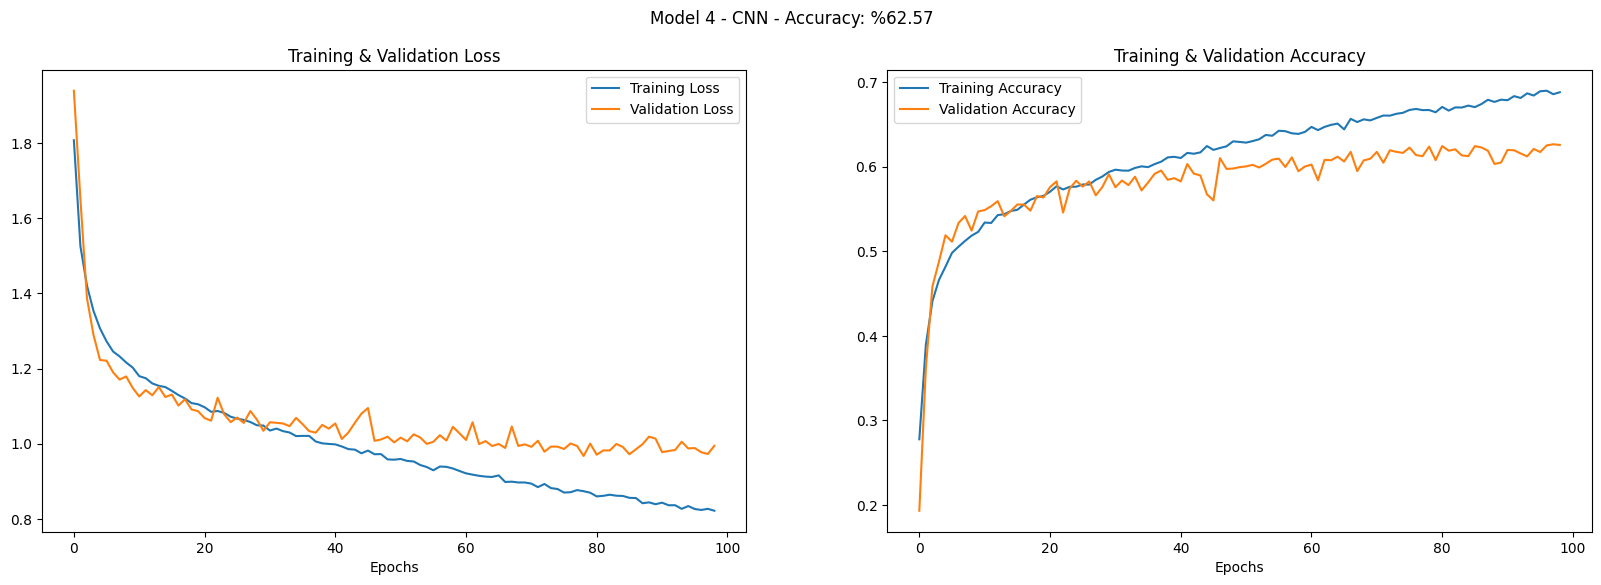

In [11]:
epochs = [i for i in range(len(history.history["loss"]))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
fig.suptitle(f"Model 4 - CNN - Accuracy: %{round(eval[1]*100,2)}")
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig("../SpeechER/figs/model4.png")

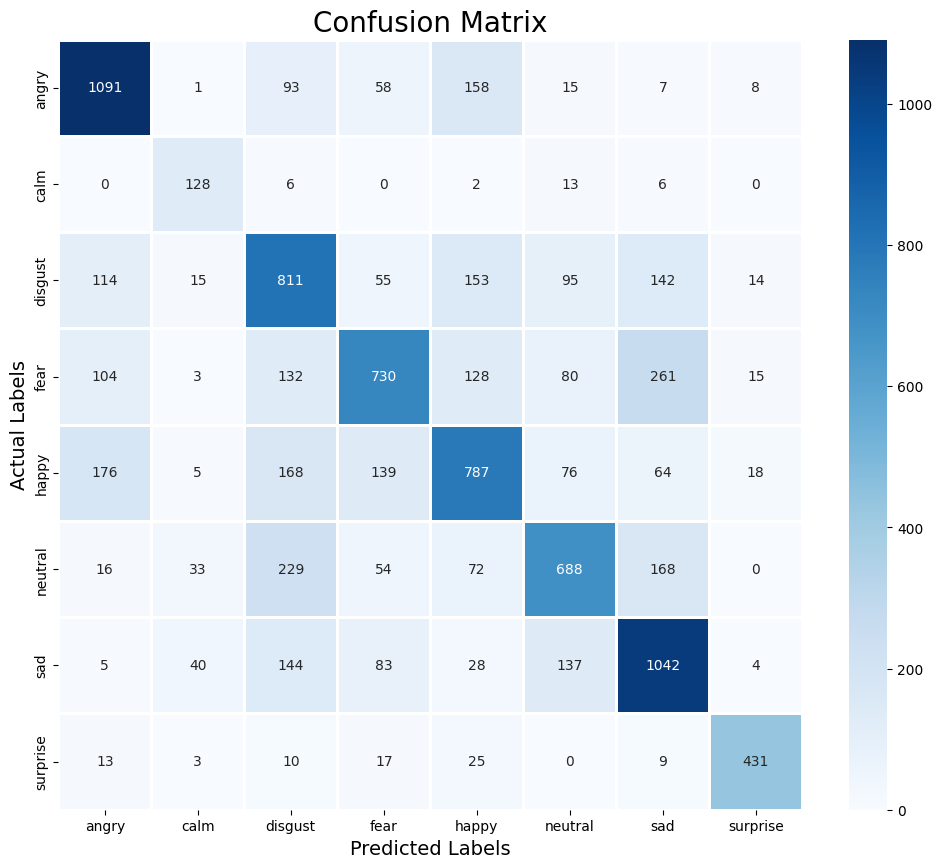

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.72      0.76      0.74      1431
        calm       0.56      0.83      0.67       155
     disgust       0.51      0.58      0.54      1399
        fear       0.64      0.50      0.56      1453
       happy       0.58      0.55      0.56      1433
     neutral       0.62      0.55      0.58      1260
         sad       0.61      0.70      0.65      1483
    surprise       0.88      0.85      0.86       508

    accuracy                           0.63      9122
   macro avg       0.64      0.66      0.65      9122
weighted avg       0.63      0.63      0.62      9122

